<h1>  Article Recommendation System <h1>

https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html

In [1]:
#loading packages
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_json('arxivData.json')
data.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [3]:
data.shape

(41000, 9)

In [4]:
print(data['title'] [3000])
print(data['summary'][3000])

Gearbox Fault Detection through PSO Exact Wavelet Analysis and SVM
  Classifier
Time-frequency methods for vibration-based gearbox faults detection have been
considered the most efficient method. Among these methods, continuous wavelet
transform (CWT) as one of the best time-frequency method has been used for both
stationary and transitory signals. Some deficiencies of CWT are problem of
overlapping and distortion ofsignals. In this condition, a large amount of
redundant information exists so that it may cause false alarm or
misinterpretation of the operator. In this paper a modified method called Exact
Wavelet Analysis is used to minimize the effects of overlapping and distortion
in case of gearbox faults. To implement exact wavelet analysis, Particle Swarm
Optimization (PSO) algorithm has been used for this purpose. This method have
been implemented for the acceleration signals from 2D acceleration sensor
acquired by Advantech PCI-1710 card from a gearbox test setup in Amirkabir
Univ

In [14]:
print(data['title'] [1500])
print(data['summary'][1500])

DeepStory: Video Story QA by Deep Embedded Memory Networks
Question-answering (QA) on video contents is a significant challenge for
achieving human-level intelligence as it involves both vision and language in
real-world settings. Here we demonstrate the possibility of an AI agent
performing video story QA by learning from a large amount of cartoon videos. We
develop a video-story learning model, i.e. Deep Embedded Memory Networks
(DEMN), to reconstruct stories from a joint scene-dialogue video stream using a
latent embedding space of observed data. The video stories are stored in a
long-term memory component. For a given question, an LSTM-based attention model
uses the long-term memory to recall the best question-story-answer triplet by
focusing on specific words containing key information. We trained the DEMN on a
novel QA dataset of children's cartoon video series, Pororo. The dataset
contains 16,066 scene-dialogue pairs of 20.5-hour videos, 27,328 fine-grained
sentences for scene d

In [5]:
print(data['title'] [2000])
print(data['summary'][2000])

Exploring Deep and Recurrent Architectures for Optimal Control
Sophisticated multilayer neural networks have achieved state of the art
results on multiple supervised tasks. However, successful applications of such
multilayer networks to control have so far been limited largely to the
perception portion of the control pipeline. In this paper, we explore the
application of deep and recurrent neural networks to a continuous,
high-dimensional locomotion task, where the network is used to represent a
control policy that maps the state of the system (represented by joint angles)
directly to the torques at each joint. By using a recent reinforcement learning
algorithm called guided policy search, we can successfully train neural network
controllers with thousands of parameters, allowing us to compare a variety of
architectures. We discuss the differences between the locomotion control task
and previous supervised perception tasks, present experimental results
comparing various architectures, 

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the article abstracts'}, xlabel='bigram'>

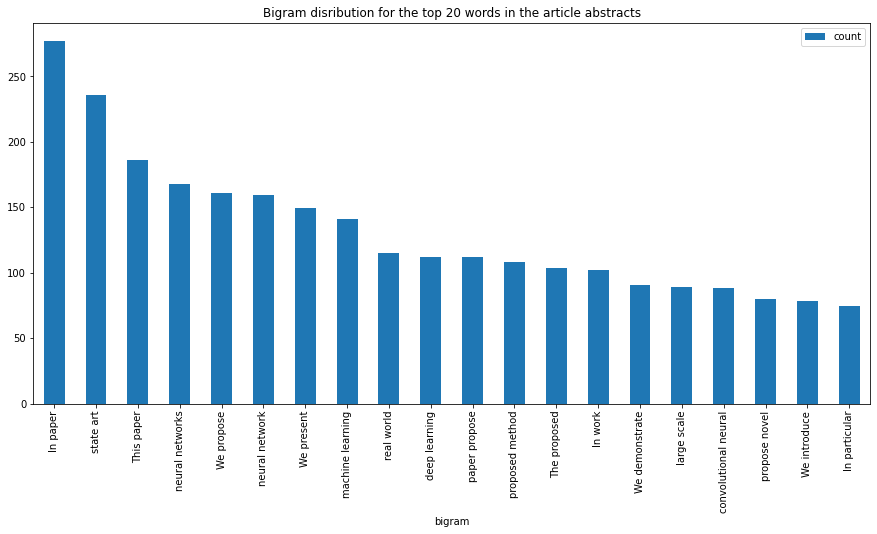

In [6]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(data['summary'])
total_words = tfidf_matrix.sum(axis=0) 
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
bigram = bigram.head(20)
bigram.plot(x ='bigram', y='count', kind = 'bar', title = 'Bigram disribution for the top 20 words in the article abstracts', figsize = (15,7), )

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the article abstract'}, xlabel='trigram'>

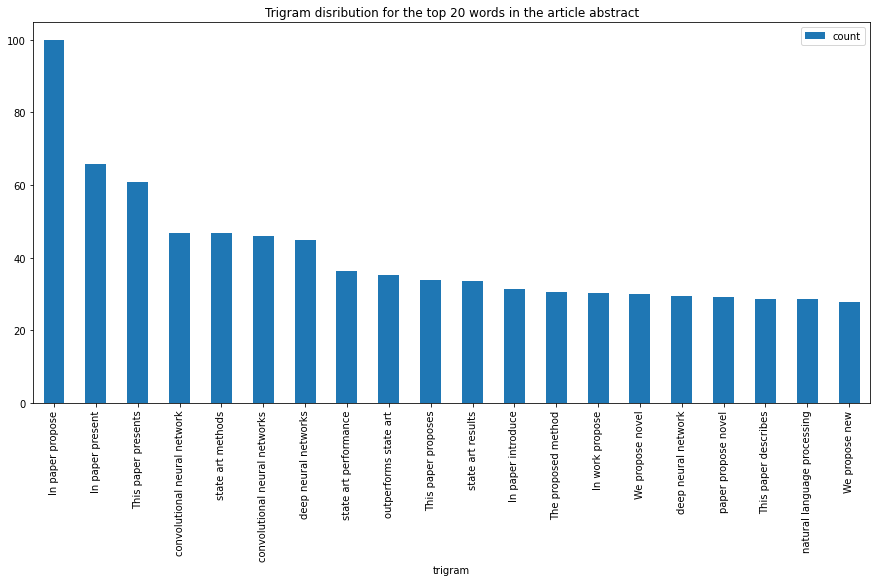

In [7]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(data['summary'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = 'Trigram disribution for the top 20 words in the article abstract', figsize = (15,7), )

In [8]:
# Clean title
def _removeNonAscii(s):
    return ''.join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = ' '.join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in title
data['cleanedt'] = data['title'].apply(_removeNonAscii)
data['cleanedt'] = data.cleanedt.apply(func = make_lower_case)
data['cleanedt'] = data.cleanedt.apply(func = remove_stop_words)
data['cleanedt'] = data.cleanedt.apply(func=remove_punctuation)
data['cleanedt'] = data.cleanedt.apply(func=remove_html)
data.head()

,author,day,id,link,month,summary,tag,title,year,cleanedt
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units visual question...
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016,sequential short text classification recurrent...
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks appl...
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017,learning share loosely related tasks
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017,deep reinforcement learning chatbot


In [9]:
# Clean Summary
def _removeNonAscii(s):
    return ''.join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = ' '.join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing 
data['cleanedd'] = data['summary'].apply(_removeNonAscii)
data['cleanedd'] = data.cleanedd.apply(func = make_lower_case)
data['cleanedd'] = data.cleanedd.apply(func = remove_stop_words)
data['cleanedd'] = data.cleanedd.apply(func=remove_punctuation)
data['cleanedd'] = data.cleanedd.apply(func=remove_html)
data.head()

,author,day,id,link,month,summary,tag,title,year,cleanedt,cleanedd
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units visual question...,propose architecture vqa utilizes recurrent la...
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016,sequential short text classification recurrent...,recent approaches based artificial neural netw...
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks appl...,introduce multiresolution recurrent neural net...
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017,learning share loosely related tasks,multi task learning motivated observation huma...
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017,deep reinforcement learning chatbot,present milabot deep reinforcement learning ch...


<h2> Recommendation engine by title <h2>

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
count = CountVectorizer()
count_matrix = count.fit_transform(data['cleanedt'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [36]:
indices = pd.Series(data['title'])
def recommend(title, cosine_sim = cosine_sim):
    recommended_articles = []
    idx = indices[indices == title].index[0]

    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    for i in top_10_indices:
        recommended_articles.append(list(data['title'])[i])
        
    return recommended_articles

### This. we write only title name

In [37]:
by_title = recommend('Concurrent bandits and cognitive radio networks')

In [38]:
from pandas import DataFrame
by_title = DataFrame (by_title,columns=['Recommendations By Title'])
by_title.index = pd.RangeIndex(start=1, stop=11, step=1)
pd.set_option('display.max_colwidth', None)
by_title

,Recommendations By Title
1,Artificial Intelligence Based Cognitive Routing for Cognitive Radio\n Networks
2,Reinforcement learning based sensing policy optimization for energy\n efficient cognitive radio networks
3,The evolution of representation in simple cognitive networks
4,Convolutional Radio Modulation Recognition Networks
5,Learning for Dynamic Bidding in Cognitive Radio Resources
6,Impact of Cognitive Radio on Future Management of Spectrum
7,Reducing Dueling Bandits to Cardinal Bandits
8,Adaptive Intelligent Cooperative Spectrum Sensing In Cognitive Radio
9,Algorithms for Dynamic Spectrum Access with Learning for Cognitive Radio
10,Spectrum Management for Cognitive Radio based on Genetics Algorithm


In [39]:
by_title_1 = recommend('DeepStory: Video Story QA by Deep Embedded Memory Networks')

In [40]:
by_title_1 = DataFrame (by_title_1,columns=['Recommendations By Title'])
by_title_1.index = pd.RangeIndex(start=1, stop=11, step=1)
pd.set_option('display.max_colwidth', None)
by_title_1

,Recommendations By Title
1,Memory Networks
2,Deep Memory Networks for Attitude Identification
3,Memory Bounded Deep Convolutional Networks
4,On the Stability of Deep Networks
5,Video Pixel Networks
6,Deep Attribute Networks
7,Video Ladder Networks
8,Video Propagation Networks
9,Deep Neural Networks
10,Deep Expander Networks: Efficient Deep Networks from Graph Theory
